In [0]:
from pyspark.sql.functions import concat_ws, col, lower, when
from pyspark.sql.types import *

# 1️⃣ Read your existing table directly via Spark
df = spark.table("workspace.default.credit_score")

# 2️⃣ (Optional) Cast / fix data types if needed
#    If some columns are stored as strings and need casting, you can do:
df_casted = df \
    .withColumn("amount", col("amount").cast("double")) \
    .withColumn("is_international", when(lower(col("is_international")) == "true", True).otherwise(False)) \
    .withColumn("is_chip", when(lower(col("is_chip")) == "true", True).otherwise(False)) \
    .withColumn("is_contactless", when(lower(col("is_contactless")) == "true", True).otherwise(False)) \
    .withColumn("label_fraud", when(lower(col("label_fraud")) == "true", True).otherwise(False))

# 3️⃣ Add the composite key column
df_transformed = df_casted.withColumn(
    "key",
    concat_ws("|", col("city"), col("merchant_cat"), col("channel"), col("card_id"))
)

# 4️⃣ Write back to a new table (or overwrite the same one)
# Use fully qualified name with catalog.schema.table
df_transformed.write.mode("overwrite").saveAsTable("workspace.default.fraud_data")

# 5️⃣ Show result to verify
display(df_transformed)


event_id event_time city channel merchant_cat card_id amount is_international is_chip is_contactless label_fraud key 943f41fe-2fcb-4ead-a2ea-c4b779c6b83c 2025-01-25T04:12:38.785Z Bengaluru ECom Grocery CARD-44801393 1.5578442345277455 false false false false Bengaluru|Grocery|ECom|CARD-44801393 57631209-ed9a-4b3a-8272-53eb45ce41bc 2025-01-29T14:58:30.879Z Mumbai POS Dining CARD-72278854 13.48360838468957 false true true false Mumbai|Dining|POS|CARD-72278854 cc867f6c-9583-473e-8154-b6d2a0be8e5f 2025-01-24T05:34:56.835Z Mumbai POS Dining CARD-47233054 0.7231511096718217 true true false false Mumbai|Dining|POS|CARD-47233054 aefeaf80-00f6-4e37-a976-390cf108a5c7 2025-01-28T08:25:38.336Z Bengaluru ECom Dining CARD-82890806 0.7611884437997538 true true false false Bengaluru|Dining|ECom|CARD-82890806 85304b37-3feb-41d7-b489-b4fddb105744 2025-01-21T17:11:50.648Z Delhi ECom Electronics CARD-10519512 2.4700399443058854 false false false false Delhi|Electronics|ECom|CARD-10519512 48fa84d3-47bb-4cd4-9227-b6a2137bce53 2025-02-04T20:54:21.147Z Chennai ECom Travel CARD-60552159 1.333770089470389 false true false false Chennai|Travel|ECom|CARD-60552159 5d39bdcc-04dc-48bd-bc40-9245c5d7cede 2025-01-24T15:25:11.440Z Bengaluru ATM Fuel CARD-11421932 0.2012812728454405 false true false false Bengaluru|Fuel|ATM|CARD-11421932 e2df2cb2-0484-4fc7-aab0-6c79f467a92a 2025-01-21T06:08:08.016Z Hyderabad POS Dining CARD-46089637 2.643743924723357 false false false false Hyderabad|Dining|POS|CARD-46089637 c0e09aca-c872-4fce-a26d-cb67e209efc0 2025-01-30T15:40:09.572Z Mumbai ATM Fuel CARD-43249517 0.6096972472326536 false false false false Mumbai|Fuel|ATM|CARD-43249517 7d94aa1a-9dac-4b9c-9033-1fc3289867ac 2025-02-04T00:41:29.124Z Bengaluru ECom Grocery CARD-63123665 2.3680857618629703 false false true false Bengaluru|Grocery|ECom|CARD-63123665 5259325a-b7de-4bbc-b56e-0f287d973b9d 2025-01-04T22:18:58.467Z Chennai ECom Grocery CARD-70433732 2.3772792178311812 false true true false Chennai|Grocery|ECom|CARD-70433732 2a21a199-84ba-4fec-a35d-35473bb47c13 2025-02-07T14:02:16.467Z Chennai ECom Dining CARD-18060406 0.5209740473932882 false false false false Chennai|Dining|ECom|CARD-18060406 6313051d-96de-475f-a2ca-4d0f45a08f22 2025-01-26T20:17:09.213Z Bengaluru ATM Grocery CARD-20518491 0.7405054174382695 false true false false Bengaluru|Grocery|ATM|CARD-20518491 d5d36c63-4953-4ae4-a5a0-b5796709e4e6 2025-02-24T16:19:29.809Z Chennai ECom Grocery CARD-12731456 0.7206780363812851 false true false false Chennai|Grocery|ECom|CARD-12731456 15d45a7f-b761-4a83-8d23-8fb74bc344a9 2025-01-28T03:13:29.141Z Bengaluru ECom Travel CARD-27695718 0.44978167085451976 false true false false Bengaluru|Travel|ECom|CARD-27695718 05f2725b-a720-495e-b536-e08bddb20cf2 2025-01-08T14:24:40.646Z Mumbai ATM Fuel CARD-74515086 4.092700465188765 false true true false Mumbai|Fuel|ATM|CARD-74515086 2bd5cfb6-17fb-41ba-8a3a-8d2350be389e 2025-01-27T09:03:09.155Z Delhi ECom Fuel CARD-64540736 5.286950620608025 false true false false Delhi|Fuel|ECom|CARD-64540736 97d20ad1-a0f3-45df-8e03-a056e47294ab 2025-01-16T05:20:23.767Z Mumbai ECom Dining CARD-44263576 3.313143275210783 true true false false Mumbai|Dining|ECom|CARD-44263576 0322bc32-a248-43ac-878a-9bc5838eec56 2025-02-23T09:12:43.143Z Bengaluru ECom Grocery CARD-56546274 2.279671386693737 false true false false Bengaluru|Grocery|ECom|CARD-56546274 3838f251-ab4c-4eab-9ce7-1cc2ca5a87ad 2025-02-26T17:15:15.264Z Chennai ATM Dining CARD-08419608 3.786295846175214 false false false false Chennai|Dining|ATM|CARD-08419608 f0662875-badb-441e-b648-c9ede7099017 2025-01-13T11:36:29.573Z Mumbai POS Travel CARD-51584801 0.2034684698987286 false true false false Mumbai|Travel|POS|CARD-51584801 00d0a250-91f6-4a34-b004-fe87a8d26455 2025-01-16T17:06:11.254Z Mumbai ECom BillPay CARD-81055057 1.0876417103071945 false true false false Mumbai|BillPay|ECom|CARD-81055057 0030704e-194b-484f-803b-f9913991e87e 2025-02-19T05:13:52.279Z Mumbai POS Grocery CARD-49989624 18.66461588

In [0]:
from pyspark.sql import functions as F

# 1️⃣ Load your existing dataset table
df = spark.table("workspace.default.credit_score")

# 2️⃣ Create credit_score column dynamically (based on amount, fraud, and card type)
df_score = df.withColumn(
    "credit_score",
    (
        850
        - (F.col("amount") * 10)                              # high amount => lower score
        - (F.when(F.col("is_international") == True, 50).otherwise(0))
        - (F.when(F.col("label_fraud") == True, 150).otherwise(0))
        + (F.when(F.col("is_chip") == True, 20).otherwise(0))
        + (F.when(F.col("is_contactless") == True, 10).otherwise(0))
    ).cast("int")
)

# Cap scores between 400 and 850
df_score = df_score.withColumn(
    "credit_score",
    F.when(F.col("credit_score") > 850, 850)
     .when(F.col("credit_score") < 400, 400)
     .otherwise(F.col("credit_score"))
)

# 3️⃣ Create credit_rating based on score
df_score = df_score.withColumn(
    "credit_rating",
    F.when(F.col("credit_score") >= 750, "Excellent")
     .when(F.col("credit_score") >= 700, "Good")
     .when(F.col("credit_score") >= 650, "Fair")
     .otherwise("Poor")
)

# 4️⃣ Save it as a new table (optional)
df_score.write.mode("overwrite").saveAsTable("workspace.default.credit_score_enriched")

# 5️⃣ Preview data
display(df_score.select("city", "amount", "is_international", "label_fraud", "credit_score", "credit_rating").limit(20))

# ===========================================================
# 🔹 Now perform analytics on enriched dataset
# ===========================================================
avg_city_score = df_score.groupBy("city").agg(
    F.avg("credit_score").alias("avg_credit_score"),
    F.count("*").alias("total_transactions")
).orderBy(F.desc("avg_credit_score"))
display(avg_city_score)

rating_dist = df_score.groupBy("credit_rating").count().orderBy(F.desc("count"))
display(rating_dist)

fraud_impact = df_score.groupBy("label_fraud").agg(
    F.avg("credit_score").alias("avg_credit_score"),
    F.count("*").alias("count")
)
display(fraud_impact)

intl_comparison = df_score.groupBy("is_international").agg(
    F.avg("credit_score").alias("avg_credit_score"),
    F.avg("amount").alias("avg_amount"),
    F.count("*").alias("transactions")
)
display(intl_comparison)


city amount is_international label_fraud credit_score credit_rating Bengaluru 1.5578442345277455 false false 834 Excellent Mumbai 13.48360838468957 false false 745 Good Mumbai 0.7231511096718217 true false 812 Excellent Bengaluru 0.7611884437997538 true false 812 Excellent Delhi 2.4700399443058854 false false 825 Excellent Chennai 1.333770089470389 false false 850 Excellent Bengaluru 0.2012812728454405 false false 850 Excellent Hyderabad 2.643743924723357 false false 823 Excellent Mumbai 0.6096972472326536 false false 843 Excellent Bengaluru 2.3680857618629703 false false 836 Excellent Chennai 2.3772792178311812 false false 850 Excellent Chennai 0.5209740473932882 false false 844 Excellent Bengaluru 0.7405054174382695 false false 850 Excellent Chennai 0.7206780363812851 false false 850 Excellent Bengaluru 0.44978167085451976 false false 850 Excellent Mumbai 4.092700465188765 false false 839 Excellent Delhi 5.286950620608025 false false 817 Excellent Mumbai 3.313143275210783 true false 786 Excellent Bengaluru 2.279671386693737 false false 847 Excellent Chennai 3.786295846175214 false false 812 Excellent

city avg_credit_score total_transactions Chennai 837.8577295629614 99831 Hyderabad 837.8029596268296 49736 Delhi 837.8027066458721 99385 Mumbai 837.7881495929781 100486 Bengaluru 837.7541212258074 150562

credit_rating count Excellent 490620 Good 5803 Fair 2642 Poor 935

label_fraud avg_credit_score count true 696.6990070335127 4834 false 839.1736064269356 495166

is_international avg_credit_score avg_amount transactions true 799.1527136837881 1.678288781542245 39872 false 841.1447771055011 1.6531956130764638 460128

In [0]:
df = spark.table("workspace.default.credit_score")
display(df.limit(5))


event_id event_time city channel merchant_cat card_id amount is_international is_chip is_contactless label_fraud key 943f41fe-2fcb-4ead-a2ea-c4b779c6b83c 2025-01-25T04:12:38.785Z Bengaluru ECom Grocery CARD-44801393 1.5578442345277455 false false false false Bengaluru|Grocery|ECom|CARD-44801393 57631209-ed9a-4b3a-8272-53eb45ce41bc 2025-01-29T14:58:30.879Z Mumbai POS Dining CARD-72278854 13.48360838468957 false true true false Mumbai|Dining|POS|CARD-72278854 cc867f6c-9583-473e-8154-b6d2a0be8e5f 2025-01-24T05:34:56.835Z Mumbai POS Dining CARD-47233054 0.7231511096718217 true true false false Mumbai|Dining|POS|CARD-47233054 aefeaf80-00f6-4e37-a976-390cf108a5c7 2025-01-28T08:25:38.336Z Bengaluru ECom Dining CARD-82890806 0.7611884437997538 true true false false Bengaluru|Dining|ECom|CARD-82890806 85304b37-3feb-41d7-b489-b4fddb105744 2025-01-21T17:11:50.648Z Delhi ECom Electronics CARD-10519512 2.4700399443058854 false false false false Delhi|Electronics|ECom|CARD-10519512

In [0]:
import pandas as pd
from pyspark.sql import functions as F

# Load Spark table
df = spark.table("workspace.default.credit_score")

# Compute credit_score dynamically
df_score = df.withColumn(
    "credit_score",
    (
        850
        - (F.col("amount") * 10)
        - (F.when(F.col("is_international") == True, 50).otherwise(0))
        - (F.when(F.col("label_fraud") == True, 150).otherwise(0))
        + (F.when(F.col("is_chip") == True, 20).otherwise(0))
        + (F.when(F.col("is_contactless") == True, 10).otherwise(0))
    ).cast("int")
)

# Cap credit_score between 400 and 850
df_score = df_score.withColumn(
    "credit_score",
    F.when(F.col("credit_score") > 850, 850)
     .when(F.col("credit_score") < 400, 400)
     .otherwise(F.col("credit_score"))
)

# Create credit_rating
df_score = df_score.withColumn(
    "credit_rating",
    F.when(F.col("credit_score") >= 750, "Excellent")
     .when(F.col("credit_score") >= 700, "Good")
     .when(F.col("credit_score") >= 650, "Fair")
     .otherwise("Poor")
)

# Convert to Pandas for Flask
pdf = df_score.toPandas()


In [0]:
import pandas as pd
from pyspark.sql import functions as F

# Load Spark table
df = spark.table("workspace.default.credit_score")

# Compute credit_score dynamically
df_score = df.withColumn(
    "credit_score",
    (
        850
        - (F.col("amount") * 10)
        - (F.when(F.col("is_international") == True, 50).otherwise(0))
        - (F.when(F.col("label_fraud") == True, 150).otherwise(0))
        + (F.when(F.col("is_chip") == True, 20).otherwise(0))
        + (F.when(F.col("is_contactless") == True, 10).otherwise(0))
    ).cast("int")
)

# Cap credit_score between 400 and 850
df_score = df_score.withColumn(
    "credit_score",
    F.when(F.col("credit_score") > 850, 850)
     .when(F.col("credit_score") < 400, 400)
     .otherwise(F.col("credit_score"))
)

# Create credit_rating
df_score = df_score.withColumn(
    "credit_rating",
    F.when(F.col("credit_score") >= 750, "Excellent")
     .when(F.col("credit_score") >= 700, "Good")
     .when(F.col("credit_score") >= 650, "Fair")
     .otherwise("Poor")
)

# Convert to Pandas for Flask
pdf = df_score.toPandas()


/home/spark-0af81110-759f-4416-afb0-c3/.ipykernel/2389/command-4902210702277759-3498028079:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pdf, x="credit_rating", order=["Excellent","Good","Fair","Poor"], palette="viridis")
/databricks/python/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


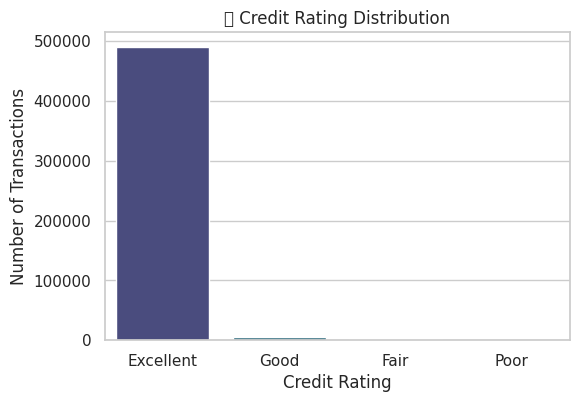

/home/spark-0af81110-759f-4416-afb0-c3/.ipykernel/2389/command-4902210702277759-3498028079:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_avg.index, y=city_avg.values, palette="magma")
/databricks/python/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


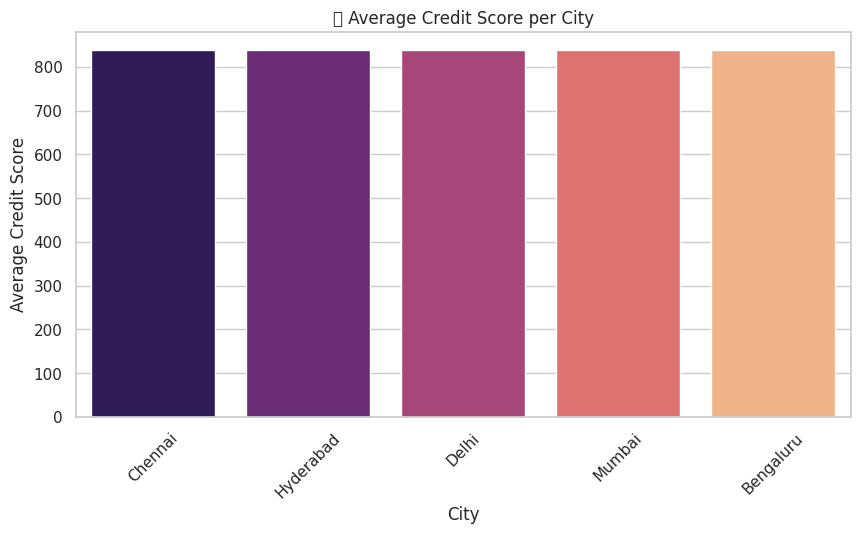

/home/spark-0af81110-759f-4416-afb0-c3/.ipykernel/2389/command-4902210702277759-3498028079:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_avg.index.astype(str), y=fraud_avg.values, palette="coolwarm")


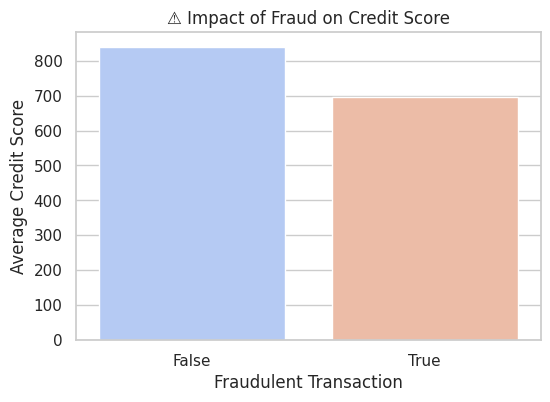

/home/spark-0af81110-759f-4416-afb0-c3/.ipykernel/2389/command-4902210702277759-3498028079:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=intl_avg.index.astype(str), y=intl_avg.values, palette="Set2")
/databricks/python/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


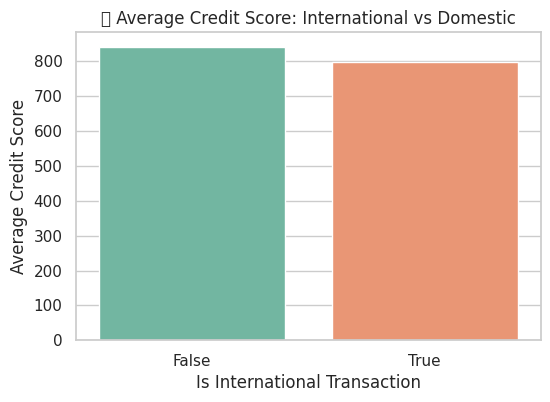

/home/spark-0af81110-759f-4416-afb0-c3/.ipykernel/2389/command-4902210702277759-3498028079:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pdf, x="credit_rating", order=["Excellent","Good","Fair","Poor"], palette="viridis", ax=axes[0,0])
/home/spark-0af81110-759f-4416-afb0-c3/.ipykernel/2389/command-4902210702277759-3498028079:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_avg.index, y=city_avg.values, palette="magma", ax=axes[0,1])
/home/spark-0af81110-759f-4416-afb0-c3/.ipykernel/2389/command-4902210702277759-3498028079:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and se

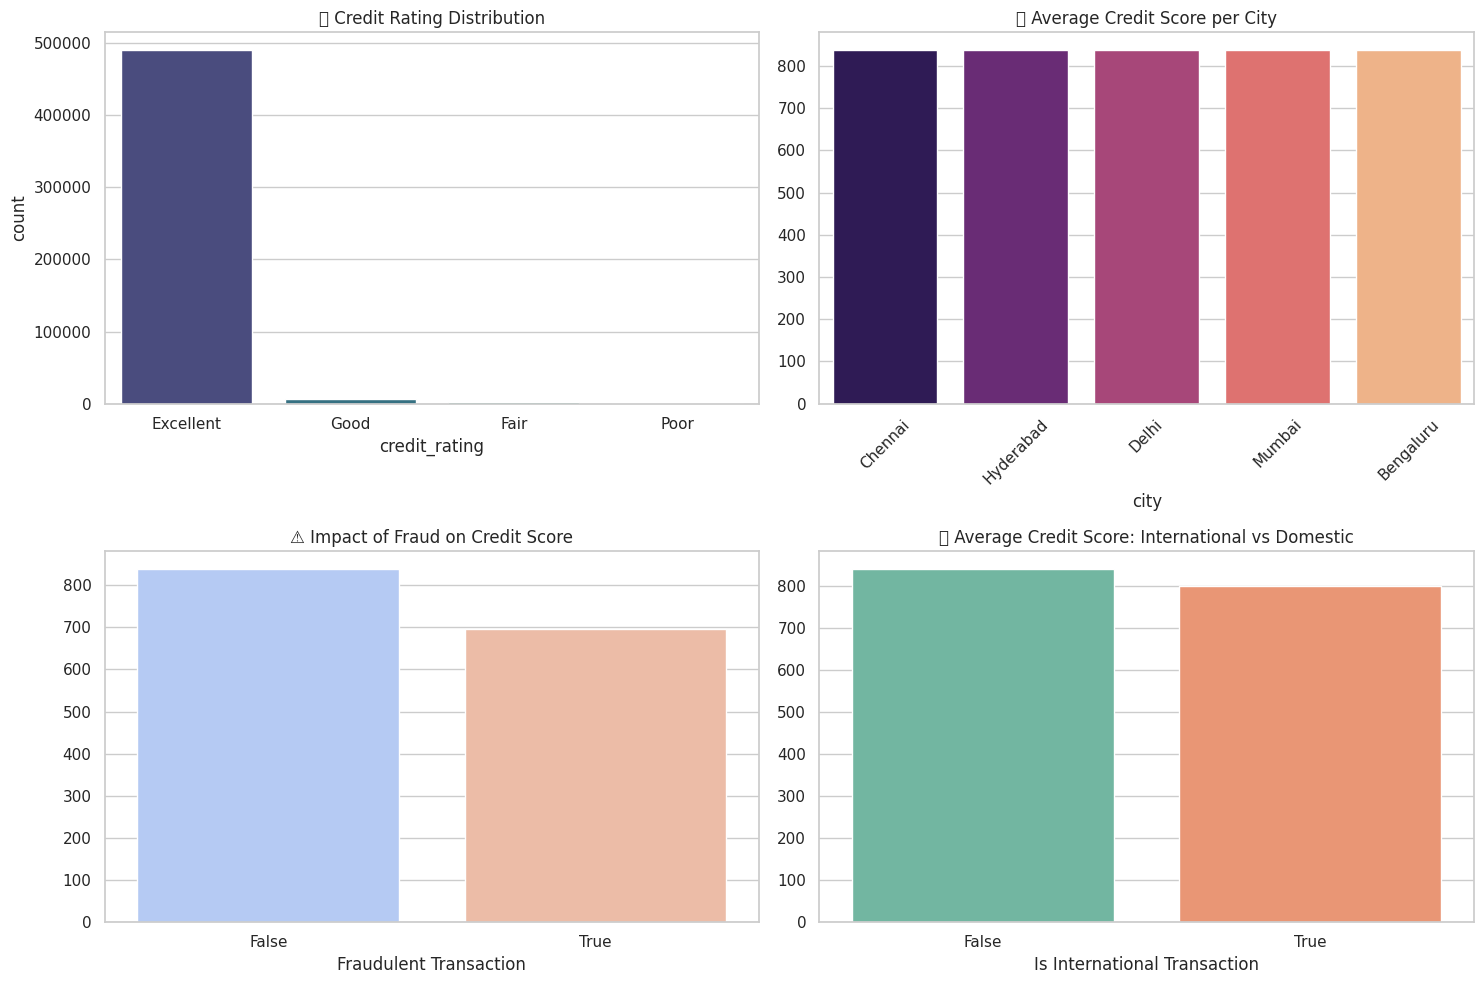

In [0]:
# ==========================================================
# 🔹 Step 1: Import Libraries
# ==========================================================
import pandas as pd
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better visuals
sns.set(style="whitegrid")

# ==========================================================
# 🔹 Step 2: Load Spark Table
# ==========================================================
df = spark.table("workspace.default.credit_score")

# ==========================================================
# 🔹 Step 3: Compute credit_score dynamically
# ==========================================================
df_score = df.withColumn(
    "credit_score",
    (
        850
        - (F.col("amount") * 10)
        - (F.when(F.col("is_international") == True, 50).otherwise(0))
        - (F.when(F.col("label_fraud") == True, 150).otherwise(0))
        + (F.when(F.col("is_chip") == True, 20).otherwise(0))
        + (F.when(F.col("is_contactless") == True, 10).otherwise(0))
    ).cast("int")
)

# Cap credit_score between 400 and 850
df_score = df_score.withColumn(
    "credit_score",
    F.when(F.col("credit_score") > 850, 850)
     .when(F.col("credit_score") < 400, 400)
     .otherwise(F.col("credit_score"))
)

# Create credit_rating based on score
df_score = df_score.withColumn(
    "credit_rating",
    F.when(F.col("credit_score") >= 750, "Excellent")
     .when(F.col("credit_score") >= 700, "Good")
     .when(F.col("credit_score") >= 650, "Fair")
     .otherwise("Poor")
)

# Convert to Pandas for visualization
pdf = df_score.toPandas()

# ==========================================================
# 🔹 Step 4: Visualizations - Individual Charts
# ==========================================================

# 1️⃣ Credit Rating Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=pdf, x="credit_rating", order=["Excellent","Good","Fair","Poor"], palette="viridis")
plt.title("📊 Credit Rating Distribution")
plt.ylabel("Number of Transactions")
plt.xlabel("Credit Rating")
plt.show()

# 2️⃣ Average Credit Score per City
city_avg = pdf.groupby("city")["credit_score"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=city_avg.index, y=city_avg.values, palette="magma")
plt.xticks(rotation=45)
plt.title("🏙️ Average Credit Score per City")
plt.ylabel("Average Credit Score")
plt.xlabel("City")
plt.show()

# 3️⃣ Fraud Impact on Credit Score
fraud_avg = pdf.groupby("label_fraud")["credit_score"].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=fraud_avg.index.astype(str), y=fraud_avg.values, palette="coolwarm")
plt.title("⚠️ Impact of Fraud on Credit Score")
plt.ylabel("Average Credit Score")
plt.xlabel("Fraudulent Transaction")
plt.show()

# 4️⃣ International vs Domestic Transactions
intl_avg = pdf.groupby("is_international")["credit_score"].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=intl_avg.index.astype(str), y=intl_avg.values, palette="Set2")
plt.title("🌍 Average Credit Score: International vs Domestic")
plt.ylabel("Average Credit Score")
plt.xlabel("Is International Transaction")
plt.show()

# ==========================================================
# 🔹 Step 5: Mini Dashboard - All Charts Together
# ==========================================================
fig, axes = plt.subplots(2, 2, figsize=(15,10))

# Credit Rating Distribution
sns.countplot(data=pdf, x="credit_rating", order=["Excellent","Good","Fair","Poor"], palette="viridis", ax=axes[0,0])
axes[0,0].set_title("📊 Credit Rating Distribution")

# Average Credit Score per City
sns.barplot(x=city_avg.index, y=city_avg.values, palette="magma", ax=axes[0,1])
axes[0,1].set_title("🏙️ Average Credit Score per City")
axes[0,1].tick_params(axis='x', rotation=45)

# Fraud Impact
sns.barplot(x=fraud_avg.index.astype(str), y=fraud_avg.values, palette="coolwarm", ax=axes[1,0])
axes[1,0].set_title("⚠️ Impact of Fraud on Credit Score")
axes[1,0].set_xlabel("Fraudulent Transaction")

# International vs Domestic
sns.barplot(x=intl_avg.index.astype(str), y=intl_avg.values, palette="Set2", ax=axes[1,1])
axes[1,1].set_title("🌍 Average Credit Score: International vs Domestic")
axes[1,1].set_xlabel("Is International Transaction")

plt.tight_layout()
plt.show()


In [0]:
# ==========================================================
# 🔹 Step 9: Databricks Widget Form for Customer Input
# ==========================================================
# Create widgets for each input field
dbutils.widgets.text("amount", "0", "Transaction Amount")
dbutils.widgets.dropdown("is_international", "False", ["True","False"], "Is International?")
dbutils.widgets.dropdown("label_fraud", "False", ["True","False"], "Is Fraudulent?")
dbutils.widgets.dropdown("is_chip", "False", ["True","False"], "Has Chip?")
dbutils.widgets.dropdown("is_contactless", "False", ["True","False"], "Is Contactless?")

# Read widget values
amount_input = float(dbutils.widgets.get("amount"))
is_international_input = dbutils.widgets.get("is_international") == "True"
label_fraud_input = dbutils.widgets.get("label_fraud") == "True"
is_chip_input = dbutils.widgets.get("is_chip") == "True"
is_contactless_input = dbutils.widgets.get("is_contactless") == "True"

# ==========================================================
# 🔹 Step 10: Predict based on Widget Input
# ==========================================================
predicted_rating = predict_credit_rating(
    amount_input, 
    is_international_input, 
    label_fraud_input, 
    is_chip_input, 
    is_contactless_input
)

# Display the result
print(f"Predicted Credit Rating for the transaction: {predicted_rating}")


---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File <command-4902210702277762>, line 12
      9 dbutils.widgets.dropdown("is_contactless", "False", ["True","False"], "Is Contactless?")
     11 # Read widget values
---> 12 amount_input = float(dbutils.widgets.get("amount"))
     13 is_international_input = dbutils.widgets.get("is_international") == "True"
     14 label_fraud_input = dbutils.widgets.get("label_fraud") == "True"

ValueError: could not convert string to float: ''

In [0]:
# ==========================================================
# 🔹 Step 11: Enhanced Prediction with Fraud Check
# ==========================================================
# Compute credit_score dynamically for input
credit_score_input = 850 \
    - (amount_input * 10) \
    - (50 if is_international_input else 0) \
    - (150 if label_fraud_input else 0) \
    + (20 if is_chip_input else 0) \
    + (10 if is_contactless_input else 0)

# Cap between 400 and 850
credit_score_input = max(400, min(850, credit_score_input))

# Determine credit_rating
if credit_score_input >= 750:
    credit_rating_input = "Excellent"
elif credit_score_input >= 700:
    credit_rating_input = "Good"
elif credit_score_input >= 650:
    credit_rating_input = "Fair"
else:
    credit_rating_input = "Poor"

# Determine if customer is fraudulent
fraud_status = "Yes" if label_fraud_input else "No"

# Display summary
print("🔹 Customer Transaction Analysis")
print(f"Credit Score: {credit_score_input}")
print(f"Predicted Credit Rating: {credit_rating_input}")
print(f"Fraudulent Transaction: {fraud_status}")


🔹 Customer Transaction Analysis
Credit Score: 850
Predicted Credit Rating: Excellent
Fraudulent Transaction: No


In [0]:
# ==========================================================
# 🔹 Step 1: Import Libraries
# ==========================================================
import pandas as pd
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Seaborn style
sns.set(style="whitegrid")

# ==========================================================
# 🔹 Step 2: Load Spark Table & Compute credit_score
# ==========================================================
df = spark.table("workspace.default.credit_score")

df_score = df.withColumn(
    "credit_score",
    (
        850
        - (F.col("amount") * 10)
        - (F.when(F.col("is_international") == True, 50).otherwise(0))
        - (F.when(F.col("label_fraud") == True, 150).otherwise(0))
        + (F.when(F.col("is_chip") == True, 20).otherwise(0))
        + (F.when(F.col("is_contactless") == True, 10).otherwise(0))
    ).cast("int")
)

df_score = df_score.withColumn(
    "credit_score",
    F.when(F.col("credit_score") > 850, 850)
     .when(F.col("credit_score") < 400, 400)
     .otherwise(F.col("credit_score"))
)

df_score = df_score.withColumn(
    "credit_rating",
    F.when(F.col("credit_score") >= 750, "Excellent")
     .when(F.col("credit_score") >= 700, "Good")
     .when(F.col("credit_score") >= 650, "Fair")
     .otherwise("Poor")
)

pdf = df_score.toPandas()

# ==========================================================
# 🔹 Step 3: Train Prediction Model for credit_rating
# ==========================================================
features = ["amount", "is_international", "label_fraud", "is_chip", "is_contactless"]
pdf[features] = pdf[features].astype(int)

target = "credit_rating"
le = LabelEncoder()
pdf[target + "_encoded"] = le.fit_transform(pdf[target])

X = pdf[features]
y = pdf[target + "_encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# ==========================================================
# 🔹 Step 4: Databricks Widget Form for User Input
# ==========================================================
dbutils.widgets.text("amount", "0", "Transaction Amount")
dbutils.widgets.dropdown("is_international", "False", ["True","False"], "Is International?")
dbutils.widgets.dropdown("label_fraud", "False", ["True","False"], "Is Fraudulent?")
dbutils.widgets.dropdown("is_chip", "False", ["True","False"], "Has Chip?")
dbutils.widgets.dropdown("is_contactless", "False", ["True","False"], "Is Contactless?")

# Read widget values
amount_input = float(dbutils.widgets.get("amount"))
is_international_input = dbutils.widgets.get("is_international") == "True"
label_fraud_input = dbutils.widgets.get("label_fraud") == "True"
is_chip_input = dbutils.widgets.get("is_chip") == "True"
is_contactless_input = dbutils.widgets.get("is_contactless") == "True"

# ==========================================================
# 🔹 Step 5: Compute Credit Score & Rating for Input
# ==========================================================
credit_score_input = 850 \
    - (amount_input * 10) \
    - (50 if is_international_input else 0) \
    - (150 if label_fraud_input else 0) \
    + (20 if is_chip_input else 0) \
    + (10 if is_contactless_input else 0)

credit_score_input = max(400, min(850, credit_score_input))

if credit_score_input >= 750:
    credit_rating_input = "Excellent"
elif credit_score_input >= 700:
    credit_rating_input = "Good"
elif credit_score_input >= 650:
    credit_rating_input = "Fair"
else:
    credit_rating_input = "Poor"

fraud_status = "Yes" if label_fraud_input else "No"

# ==========================================================
# 🔹 Step 6: Predict using ML Model (optional)
# ==========================================================
input_df = pd.DataFrame({
    "amount": [amount_input],
    "is_international": [int(is_international_input)],
    "label_fraud": [int(label_fraud_input)],
    "is_chip": [int(is_chip_input)],
    "is_contactless": [int(is_contactless_input)]
})
predicted_rating = le.inverse_transform(rf.predict(input_df))[0]

# ==========================================================
# 🔹 Step 7: Display Results
# ==========================================================
print("🔹 Customer Transaction Analysis")
print(f"Credit Score (calculated): {credit_score_input}")
print(f"Credit Rating (calculated): {credit_rating_input}")
print(f"Fraudulent Transaction: {fraud_status}")
print(f"Credit Rating (ML model prediction): {predicted_rating}")


✅ Fraud Prediction Model Accuracy: 100.00%
🔹 Customer Fraud Analysis
Credit Score: 400
Predicted Fraudulent Transaction: False
Fraud Probability: 0.00%


/home/spark-dcf865f2-d30f-4eea-b121-8c/.ipykernel/5075/command-4902210702277766-94266856:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pdf, x="label_fraud", palette="coolwarm")


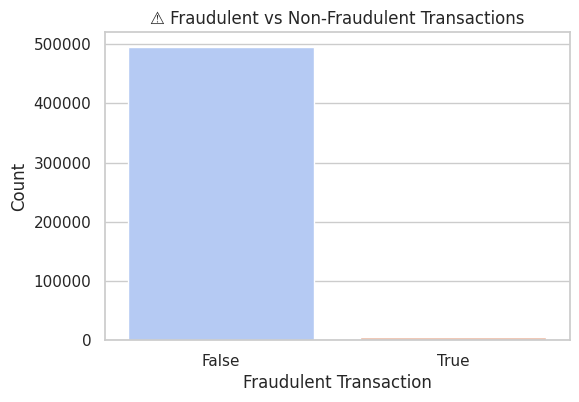

/home/spark-dcf865f2-d30f-4eea-b121-8c/.ipykernel/5075/command-4902210702277766-94266856:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_score_avg.index.astype(str), y=fraud_score_avg.values, palette="magma")
/databricks/python/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


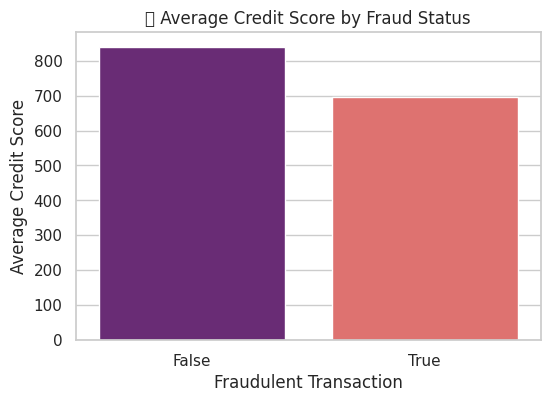

In [0]:
# ==========================================================
# 🔹 Step 1: Import Libraries
# ==========================================================
import pandas as pd
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

sns.set(style="whitegrid")

# ==========================================================
# 🔹 Step 2: Load Spark Table & Compute credit_score
# ==========================================================
df = spark.table("workspace.default.credit_score")

df_score = df.withColumn(
    "credit_score",
    (
        850
        - (F.col("amount") * 10)
        - (F.when(F.col("is_international") == True, 50).otherwise(0))
        - (F.when(F.col("label_fraud") == True, 150).otherwise(0))
        + (F.when(F.col("is_chip") == True, 20).otherwise(0))
        + (F.when(F.col("is_contactless") == True, 10).otherwise(0))
    ).cast("int")
)

df_score = df_score.withColumn(
    "credit_score",
    F.when(F.col("credit_score") > 850, 850)
     .when(F.col("credit_score") < 400, 400)
     .otherwise(F.col("credit_score"))
)

df_score = df_score.withColumn(
    "credit_rating",
    F.when(F.col("credit_score") >= 750, "Excellent")
     .when(F.col("credit_score") >= 700, "Good")
     .when(F.col("credit_score") >= 650, "Fair")
     .otherwise("Poor")
)

pdf = df_score.toPandas()

# ==========================================================
# 🔹 Step 3: Train ML Model for Fraud Prediction
# ==========================================================
# Features to predict fraud
fraud_features = ["amount", "is_international", "is_chip", "is_contactless", "credit_score"]
pdf[fraud_features] = pdf[fraud_features].astype(int)

target_fraud = "label_fraud"
le_fraud = LabelEncoder()
pdf[target_fraud + "_encoded"] = le_fraud.fit_transform(pdf[target_fraud])

X_fraud = pdf[fraud_features]
y_fraud = pdf[target_fraud + "_encoded"]

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_fraud, y_fraud, test_size=0.2, random_state=42)

rf_fraud = RandomForestClassifier(n_estimators=100, random_state=42)
rf_fraud.fit(X_train_f, y_train_f)

# Evaluate model
fraud_accuracy = rf_fraud.score(X_test_f, y_test_f)
print(f"✅ Fraud Prediction Model Accuracy: {fraud_accuracy*100:.2f}%")

# ==========================================================
# 🔹 Step 4: Databricks Widgets for User Input
# ==========================================================
dbutils.widgets.text("amount", "0", "Transaction Amount")
dbutils.widgets.dropdown("is_international", "False", ["True","False"], "Is International?")
dbutils.widgets.dropdown("is_chip", "False", ["True","False"], "Has Chip?")
dbutils.widgets.dropdown("is_contactless", "False", ["True","False"], "Is Contactless?")

# Read widget values
amount_input = float(dbutils.widgets.get("amount"))
is_international_input = dbutils.widgets.get("is_international") == "True"
is_chip_input = dbutils.widgets.get("is_chip") == "True"
is_contactless_input = dbutils.widgets.get("is_contactless") == "True"

# ==========================================================
# 🔹 Step 5: Compute Credit Score for Input
# ==========================================================
credit_score_input = 850 \
    - (amount_input * 10) \
    - (50 if is_international_input else 0) \
    + (20 if is_chip_input else 0) \
    + (10 if is_contactless_input else 0)

credit_score_input = max(400, min(850, credit_score_input))

# ==========================================================
# 🔹 Step 6: Predict Fraud for Input
# ==========================================================
input_fraud_df = pd.DataFrame({
    "amount": [amount_input],
    "is_international": [int(is_international_input)],
    "is_chip": [int(is_chip_input)],
    "is_contactless": [int(is_contactless_input)],
    "credit_score": [credit_score_input]
})

predicted_fraud = le_fraud.inverse_transform(rf_fraud.predict(input_fraud_df))[0]
fraud_probability = rf_fraud.predict_proba(input_fraud_df)[0][1]  # probability of being fraudulent

# ==========================================================
# 🔹 Step 7: Display Fraud Analysis Result
# ==========================================================
print("🔹 Customer Fraud Analysis")
print(f"Credit Score: {credit_score_input}")
print(f"Predicted Fraudulent Transaction: {predicted_fraud}")
print(f"Fraud Probability: {fraud_probability*100:.2f}%")

# ==========================================================
# 🔹 Step 8: Visualizations for Fraud Analysis
# ==========================================================
# 1️⃣ Fraud Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=pdf, x="label_fraud", palette="coolwarm")
plt.title("⚠️ Fraudulent vs Non-Fraudulent Transactions")
plt.xlabel("Fraudulent Transaction")
plt.ylabel("Count")
plt.show()

# 2️⃣ Average Credit Score by Fraud Status
fraud_score_avg = pdf.groupby("label_fraud")["credit_score"].mean()
plt.figure(figsize=(6,4))
sns.barplot(x=fraud_score_avg.index.astype(str), y=fraud_score_avg.values, palette="magma")
plt.title("📊 Average Credit Score by Fraud Status")
plt.xlabel("Fraudulent Transaction")
plt.ylabel("Average Credit Score")
plt.show()


Total Fraudulent Transactions: 4834


/home/spark-0af81110-759f-4416-afb0-c3/.ipykernel/2389/command-4902210702277768-3935557210:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_df, x="city", palette="Reds")
/databricks/python/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


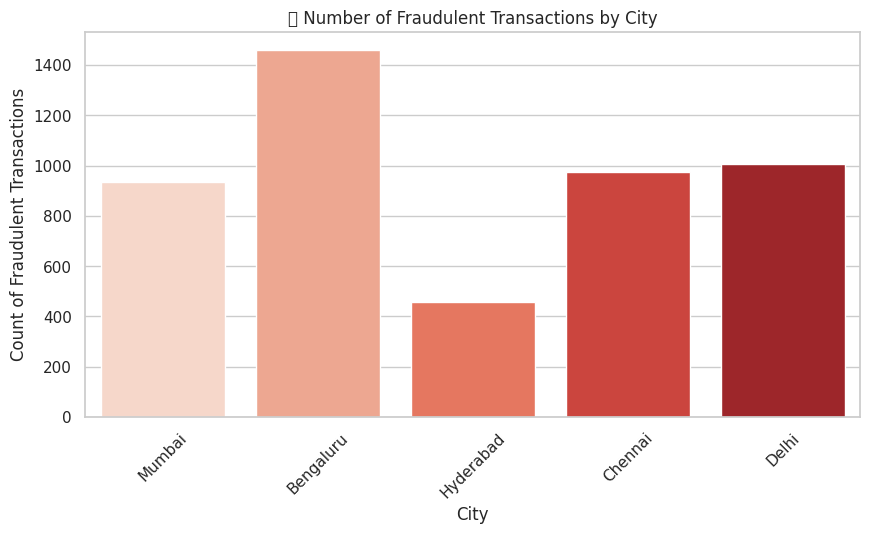

/home/spark-0af81110-759f-4416-afb0-c3/.ipykernel/2389/command-4902210702277768-3935557210:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_city_avg.index, y=fraud_city_avg.values, palette="Oranges")
/databricks/python/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


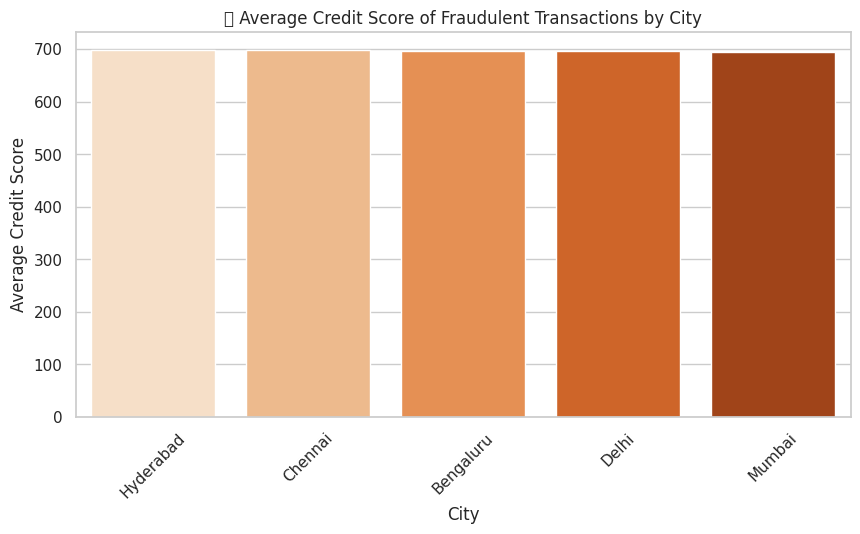

/home/spark-0af81110-759f-4416-afb0-c3/.ipykernel/2389/command-4902210702277768-3935557210:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_df, x="is_chip", palette="Set1")
/databricks/python/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


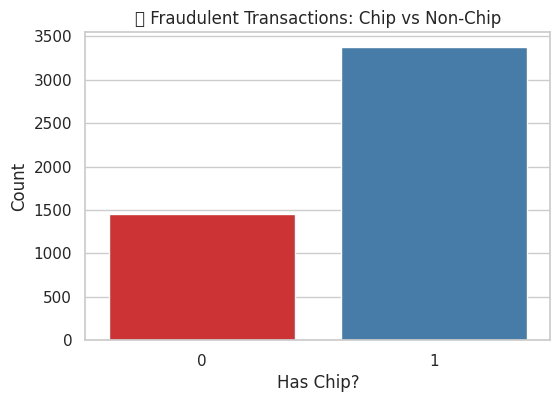

/home/spark-0af81110-759f-4416-afb0-c3/.ipykernel/2389/command-4902210702277768-3935557210:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_df, x="is_contactless", palette="Set2")
/databricks/python/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


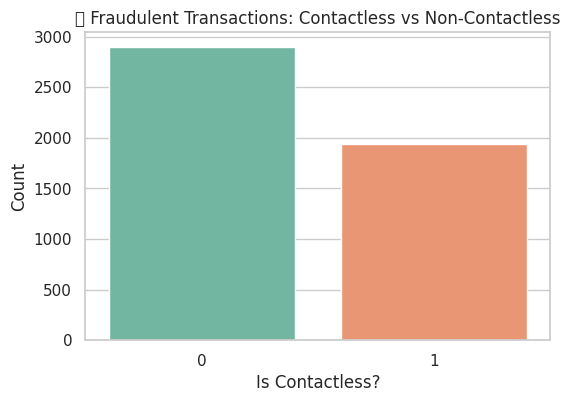

🔹 Fraudulent Transactions Summary:
            amount  credit_score      is_chip  is_contactless
count  4834.000000   4834.000000  4834.000000     4834.000000
mean      1.169011    696.699007     0.698800        0.400496
std       1.992896     26.662783     0.458827        0.490050
min       0.000000    472.000000     0.000000        0.000000
25%       0.000000    688.000000     0.000000        0.000000
50%       1.000000    704.000000     1.000000        0.000000
75%       1.000000    715.000000     1.000000        1.000000
max      24.000000    729.000000     1.000000        1.000000

Top 5 Highest Fraudulent Transactions:
        amount  credit_score       city  is_chip  is_contactless
420966      24           472     Mumbai        1               0
232919      22           493     Mumbai        1               0
178762      20           521  Bengaluru        1               1
297040      18           535     Mumbai        1               0
272850      18           544  Bengaluru   

In [0]:
# ==========================================================
# 🔹 Step 8: Filter Fraudulent Transactions
# ==========================================================
fraud_df = pdf[pdf['label_fraud'] == True]

print(f"Total Fraudulent Transactions: {len(fraud_df)}")

# ==========================================================
# 🔹 Step 9: Visualizations for Fraudulent Transactions
# ==========================================================

# 1️⃣ Fraudulent Transactions Distribution by City
plt.figure(figsize=(10,5))
sns.countplot(data=fraud_df, x="city", palette="Reds")
plt.title("🏙️ Number of Fraudulent Transactions by City")
plt.xlabel("City")
plt.ylabel("Count of Fraudulent Transactions")
plt.xticks(rotation=45)
plt.show()

# 2️⃣ Average Credit Score of Fraudulent Transactions by City
fraud_city_avg = fraud_df.groupby("city")["credit_score"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=fraud_city_avg.index, y=fraud_city_avg.values, palette="Oranges")
plt.title("📊 Average Credit Score of Fraudulent Transactions by City")
plt.xlabel("City")
plt.ylabel("Average Credit Score")
plt.xticks(rotation=45)
plt.show()

# 3️⃣ Chip vs Non-Chip Fraudulent Transactions
plt.figure(figsize=(6,4))
sns.countplot(data=fraud_df, x="is_chip", palette="Set1")
plt.title("💳 Fraudulent Transactions: Chip vs Non-Chip")
plt.xlabel("Has Chip?")
plt.ylabel("Count")
plt.show()

# 4️⃣ Contactless vs Non-Contactless Fraudulent Transactions
plt.figure(figsize=(6,4))
sns.countplot(data=fraud_df, x="is_contactless", palette="Set2")
plt.title("📡 Fraudulent Transactions: Contactless vs Non-Contactless")
plt.xlabel("Is Contactless?")
plt.ylabel("Count")
plt.show()

# ==========================================================
# 🔹 Step 10: Summary Statistics for Fraudulent Transactions
# ==========================================================
print("🔹 Fraudulent Transactions Summary:")
print(fraud_df[["amount", "credit_score", "city", "is_chip", "is_contactless"]].describe())

# Optional: Top 5 Highest Fraudulent Transaction Amounts
top_frauds = fraud_df.sort_values(by="amount", ascending=False).head(5)
print("\nTop 5 Highest Fraudulent Transactions:")
print(top_frauds[["amount", "credit_score", "city", "is_chip", "is_contactless"]])
